# Exercise 1: Monty Hall problem
## Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already... but don't think now! **Let's simulate it**. 


### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#the cars will always be in the last indexes, to simplify the wiritng of the code, but since they are doing random choices its position doesn't matter

def monty_hall ( N_simulations, n_doors, n_cars, n_presenter):

    indexes = np.array(range(n_doors))

    switcher_counter = 0
    conservative_counter = 0
    newcomer_counter = 0
    
    for i in range (N_simulations):
        #the player chooses one of the doors
        player = np.random.choice(indexes)
        presenter = []
        #found that the set function creates an object in which I can do intersections and verify quickly if elements ar e in that set...
        available_doors = set(indexes) - {player, n_doors - 1}
        
        '''#qua devo mettere un for ciclo m=n-2 per il presenter
        for j in range (N_presenter):        #NON VA LA UGUAGLIANZA CON PRESENTER !!!
            presenter = np.append(presenter, [np.random.choice( (indexes[ ( (indexes != player) & (indexes != len(doors)-1) & (indexes != presenter) ) ]))] )
        print(presenter)
        #presenter = np.random.choice( (indexes[ ( (indexes != player) & (indexes != len(doors)-1) ) ]) )
        '''
        presenter = np.random.choice( list(available_doors), n_presenter, replace= False)
        remaining_doors = set(indexes) - set(presenter) - {player}
        newcomer_doors = set(indexes) - set(presenter)
        
        conservative = player
        switcher = np.random.choice( list(remaining_doors) )
        newcomer = np.random.choice( list(newcomer_doors) )
        
        if switcher >= n_doors-n_cars:
            switcher_counter = switcher_counter + 1
        if conservative >= n_doors-n_cars:
            conservative_counter = conservative_counter + 1
        if newcomer >= n_doors-n_cars:
            newcomer_counter = newcomer_counter + 1
    
    #print (presenter, switcher_counter, conservative_counter, newcomer_counter)
    return switcher_counter, conservative_counter, newcomer_counter


In [3]:
N_simulations = 1000000

#I'm writing it like this because then I can easily implement it with the number of cars growing too ---> then the condition for winning will just be the index to be higher than the last goat_index
n_goats = 2
n_cars = 1
n_doors = n_goats + n_cars 


n_presenter = n_doors - 2 #can change this!!

print( "doors:",n_doors, "\nthe presenter will open:", n_presenter, "of them")

doors: 3 
the presenter will open: 1 of them


In [4]:
switcher_counter, conservative_counter, newcomer_counter = monty_hall (N_simulations, n_doors, n_cars, n_presenter)

print (" switcher probability to win the car:", (100*switcher_counter/N_simulations), "%\n",
       "conservative probability to win the car:", 100*conservative_counter/N_simulations, "%\n",
       "newcomer probability to win the car:", 100*newcomer_counter/N_simulations, "%" )

 switcher probability to win the car: 66.6084 %
 conservative probability to win the car: 33.3916 %
 newcomer probability to win the car: 49.9674 %


## let's see what happens changing N and M

### changing the number of doors, keeping the presenter opening n_doors-2 

In [69]:
N_simulations = 1000
switcher_counter_list = []
conservative_counter_list = []
newcomer_counter_list = []

n_cars = 1
n_doors = np.round(np.logspace(1, 3, 100)).astype(int)

for n in tqdm(n_doors):
    n_presenter = n - 2 
    
    counters = monty_hall (N_simulations, n, n_cars, n_presenter)
    switcher_counter_list = np.append(switcher_counter_list, counters[0])
    conservative_counter_list = np.append(conservative_counter_list, counters[1])
    newcomer_counter_list = np.append(newcomer_counter_list, counters[2])

switcher_counter = np.array(switcher_counter_list)
conservative_counter = np.array(conservative_counter_list)
newcomer_counter = np.array(newcomer_counter_list)

100%|█████████████████████████████████████████| 100/100 [00:17<00:00,  5.67it/s]


In [70]:
#print (switcher_counter, conservative_counter, newcomer_counter)

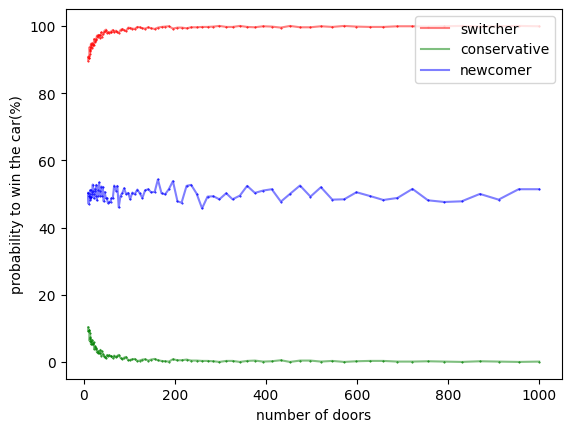

In [71]:
plt.scatter( n_doors, 100*switcher_counter/N_simulations, c = "red", s = 0.2)
plt.scatter(n_doors, 100*conservative_counter/N_simulations,  c = "green", s = 0.2)
plt.scatter( n_doors, 100*newcomer_counter/N_simulations, c = "blue",  s = 0.2)


plt.plot( n_doors, 100*switcher_counter/N_simulations, c = "red", label = "switcher", alpha = 0.5)
plt.plot(n_doors, 100*conservative_counter/N_simulations,  c = "green", label = "conservative", alpha = 0.5)
plt.plot( n_doors, 100*newcomer_counter/N_simulations, c = "blue", label = "newcomer", alpha = 0.5)

plt.xlabel("number of doors")
plt.ylabel("probability to win the car(%)")
#plt.yscale("log")
plt.legend()

### now we change  the number of doors the presenter is opening

In [72]:
N_simulations = 1000
switcher_counter_list = []
conservative_counter_list = []
newcomer_counter_list = []

n_cars = 1
n_doors = 100
print
n_presenter = np.round(np.linspace(0, n_doors -2, 100)).astype(int)

for n_pres in tqdm(n_presenter):
      
    counters = monty_hall (N_simulations, n_doors, n_cars, n_pres)
    switcher_counter_list = np.append(switcher_counter_list, counters[0])
    conservative_counter_list = np.append(conservative_counter_list, counters[1])
    newcomer_counter_list = np.append(newcomer_counter_list, counters[2])

switcher_counter = np.array(switcher_counter_list)
conservative_counter = np.array(conservative_counter_list)
newcomer_counter = np.array(newcomer_counter_list)

100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  7.76it/s]


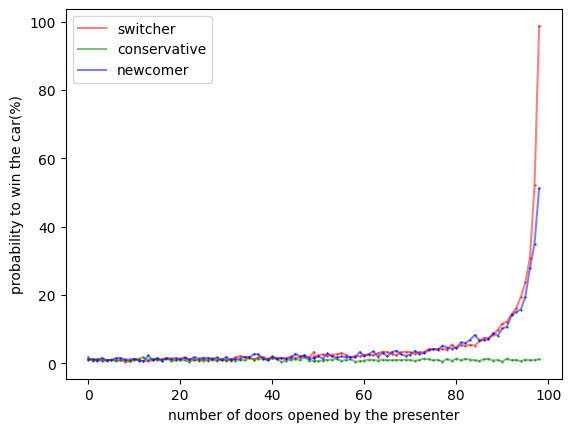

In [73]:
plt.scatter( n_presenter, 100*switcher_counter/N_simulations, c = "red", s = 0.2)
plt.scatter(n_presenter, 100*conservative_counter/N_simulations,  c = "green", s = 0.2)
plt.scatter( n_presenter, 100*newcomer_counter/N_simulations, c = "blue", s = 0.2)


plt.plot( n_presenter, 100*switcher_counter/N_simulations, c = "red", label = "switcher", alpha = 0.5)
plt.plot(n_presenter, 100*conservative_counter/N_simulations,  c = "green", label = "conservative", alpha = 0.5)
plt.plot( n_presenter, 100*newcomer_counter/N_simulations, c = "blue", label = "newcomer", alpha = 0.5)

plt.xlabel("number of doors opened by the presenter")
plt.ylabel("probability to win the car(%)")
#plt.yscale("log")
plt.legend()